# Analyzing River Thames Water Levels

Time series data is everywhere, from watching your stock portfolio to monitoring climate change, and even live-tracking as local cases of a virus become a global pandemic. In this project, you’ll work with a time series that tracks the tide levels of the Thames River. You’ll first load the data and inspect it data visually, and then perform calculations on the dataset to generate some summary statistics. You’ll end by decomposing the time series into its component attributes and analyzing them.

The original dataset is available from the British Oceanographic Data Center [here](https://www.bodc.ac.uk/data/published_data_library/catalogue/10.5285/b66afb2c-cd53-7de9-e053-6c86abc0d251) and you can read all about this fascinating archival story in [this article](https://www.nature.com/articles/s41597-022-01223-7) from the Nature journal.

Here's a map of the locations of the tidal gauges along the River Thames in London.

![](locations.png)

The dataset comes with a file called `Data_description.pdf`. The dataset consists of 13 `.txt` files, containing comma separated data. We'll begin by analyzing one of them, the London Bridge gauge, and preparing it for analysis. The same code can be used to analyze data from other files (i.e. other gauges along the river) later.

| Variable Name | Description                                                                               | Format                                                                                      |
| ------------- | ----------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------- |
| Date and time | Date and time of measurement to GMT. Note the tide gauge is accurate to one minute.       | dd/mm/yyyy hh:mm:ss                                                                         |
| Water level   | High or low water level measured by tide gauge. Tide gauges are accurate to 1 centimetre. | metres (Admiralty Chart Datum (CD), Ordnance Datum Newlyn (ODN or Trinity High Water (THW)) |
| Flag          | High water flag = 1, low water flag = 0                                                   | Categorical (0 or 1)                                                                        |


In [26]:
import pandas as pd


def IQR(column):
    q25, q75 = column.quantile([0.25, 0.75])
    return q75 - q25

### Task 1: Loading and filtering data from London Bridge

Begin by using pandas to load the London Bridge data as lb; you can find the file path by navigating through the data folder in your workspace. Since the column "flag, HW=1 or LW=0" has a comma, pandas will create an extra, empty column when reading this as a csv. Create a new DataFrame df, which takes only the first three columns of lb, and rename them as datetime, water_level, and is_high_tide, respectively.


In [27]:
filepath = "data/10-11_London_Bridge.txt"
lb = pd.read_csv(filepath)

london_bridge = pd.DataFrame(columns=["datetime", "water_level", "is_high_tide"])

london_bridge["datetime"] = lb.iloc[:, 0:1]
london_bridge["water_level"] = lb.iloc[:, 1:2]
london_bridge["is_high_tide"] = lb.iloc[:, 2:3]
london_bridge.head()

,datetime,water_level,is_high_tide
0,01/05/1911 15:40:00,3.7130,1
1,02/05/1911 11:25:00,-2.9415,0
2,02/05/1911 16:05:00,3.3828,1
3,03/05/1911 11:50:00,-2.6367,0
4,03/05/1911 16:55:00,2.9256,1


### Task 2: Preparing selected columns for analysis

By calling .dtypes on df, you'll find that the datetime and water_level columns are currently of the object data type. Convert the datetime column to the datetime format and water_level to the float format. Add two new columns to df, month and year, which you'll need to extract from datetime.


In [28]:
london_bridge["datetime"] = pd.to_datetime(london_bridge["datetime"])
london_bridge["water_level"] = london_bridge["water_level"].astype(float)

london_bridge["year"] = london_bridge["datetime"].dt.year
london_bridge["month"] = london_bridge["datetime"].dt.month


london_bridge.head()

,datetime,water_level,is_high_tide,year,month
0,1911-01-05 15:40:00,3.7130,1,1911,1
1,1911-02-05 11:25:00,-2.9415,0,1911,2
2,1911-02-05 16:05:00,3.3828,1,1911,2
3,1911-03-05 11:50:00,-2.6367,0,1911,3
4,1911-03-05 16:55:00,2.9256,1,1911,3


### Task 3: Get a sense of typical tide levels for London Bridge

As shown in the Data Description table, the is_high_tide column has two values, 0 and 1, indicating low and high tide, respectively. Create a variable called tide_high, which returns the column water_level from df only where tide is high, and another variable called tide_low, which returns the column water_level from df only where tide is low. Using tide_high and tide_low, create two dictionaries, high_statistics and low_statistics, containing the mean, median, and IQR of each variable respectively, using the .agg() function from pandas and the IQR function provided.


In [29]:
tide_high = london_bridge[london_bridge["is_high_tide"] == 1]["water_level"]
tide_low = london_bridge[london_bridge["is_high_tide"] == 0]["water_level"]


(tide_low.head(), tide_high.head())

high_statistics = tide_high.agg(["mean", "median", IQR])
low_statistics = tide_low.agg(["mean", "median", IQR])

high_statistics, low_statistics

(mean      3.318373
 median    3.352600
 IQR       0.743600
 Name: water_level, dtype: float64,
 mean     -2.383737
 median   -2.412900
 IQR       0.538200
 Name: water_level, dtype: float64)

### Task 4: Count the number of days London Bridge had record-high tide levels over the last 84 years.

Return a pandas Series that counts the number of days of high tide data you have per year in df and store it as all_high_days. Return a pandas Series that counts the number of days of data where water level was above the 75th percentile in df. Return a variable called high_ratio, which computes the ratio of high_days to all_high_days.


In [30]:
count_high_tide_by_year = london_bridge[london_bridge["is_high_tide"] == 1].groupby("year").count()
all_high_days = pd.Series(count_high_tide_by_year["is_high_tide"]).rename("high_days")


percentile_75 = london_bridge["water_level"].quantile(0.75)
high_days = london_bridge[london_bridge["water_level"] > percentile_75].groupby("year").count()
high_days = pd.Series(high_days["water_level"]).rename("high_days_above_75_percentile")

high_ratio = high_days / all_high_days

all_high_days.head(), high_days.head(), high_ratio

(year
 1911    244
 1912    557
 1913    669
 1914    688
 1915    666
 Name: high_days, dtype: int64,
 year
 1911     63
 1912    210
 1913    282
 1914    261
 1915    285
 Name: high_days_above_75_percentile, dtype: int64,
 year
 1911    0.258197
 1912    0.377020
 1913    0.421525
 1914    0.379360
 1915    0.427928
           ...   
 1991    0.515581
 1992    0.545969
 1993    0.576538
 1994    0.597163
 1995    0.609929
 Length: 85, dtype: float64)

### Task 5: Count the number of days London Bridge had record-low tide levels over the last 84 years.

Return a pandas Series that counts the number of days of low tide data you have per year in df and store it as all_low_days. Return a pandas Series that counts the number of days of data where the water level was below the 25th percentile in df. Return a variable called low_ratio which computes the ratio of low_days to all_low_days.


In [31]:
count_low_tide_by_year = london_bridge[london_bridge["is_high_tide"] == 0].groupby("year").count()
all_low_days = pd.Series(count_low_tide_by_year["is_high_tide"]).rename("low_days")


percentile_25 = london_bridge["water_level"].quantile(0.25)
low_days = london_bridge[london_bridge["water_level"] < percentile_25].groupby("year").count()
low_days = pd.Series(low_days["water_level"]).rename("low_days_below_25_percentile")

low_ratio = low_days / all_low_days

all_low_days.head(), low_days.head(), low_ratio

(year
 1911    231
 1912    555
 1913    670
 1914    692
 1915    658
 Name: low_days, dtype: int64,
 year
 1911    115
 1912    244
 1913    246
 1914    264
 1915    246
 Name: low_days_below_25_percentile, dtype: int64,
 year
 1911    0.497835
 1912    0.439640
 1913    0.367164
 1914    0.381503
 1915    0.373860
           ...   
 1991    0.554610
 1992    0.489392
 1993    0.490728
 1994    0.459574
 1995    0.487943
 Length: 85, dtype: float64)

### Task 6: Print your solution

Return your solution as a dictionary with the keys high_statistics, low_statistics, high_ratio, and low_ratio. Use the variables you have already generated as values for each of these keys.


In [32]:
solution = {"high_statistics": high_statistics, "low_statistics": low_statistics, "high_ratio": high_ratio, "low_ratio": low_ratio}
print(solution)

{'high_statistics': mean      3.318373
median    3.352600
IQR       0.743600
Name: water_level, dtype: float64, 'low_statistics': mean     -2.383737
median   -2.412900
IQR       0.538200
Name: water_level, dtype: float64, 'high_ratio': year
1911    0.258197
1912    0.377020
1913    0.421525
1914    0.379360
1915    0.427928
          ...   
1991    0.515581
1992    0.545969
1993    0.576538
1994    0.597163
1995    0.609929
Length: 85, dtype: float64, 'low_ratio': year
1911    0.497835
1912    0.439640
1913    0.367164
1914    0.381503
1915    0.373860
          ...   
1991    0.554610
1992    0.489392
1993    0.490728
1994    0.459574
1995    0.487943
Length: 85, dtype: float64}


### Task 7: Some Insighful Plots


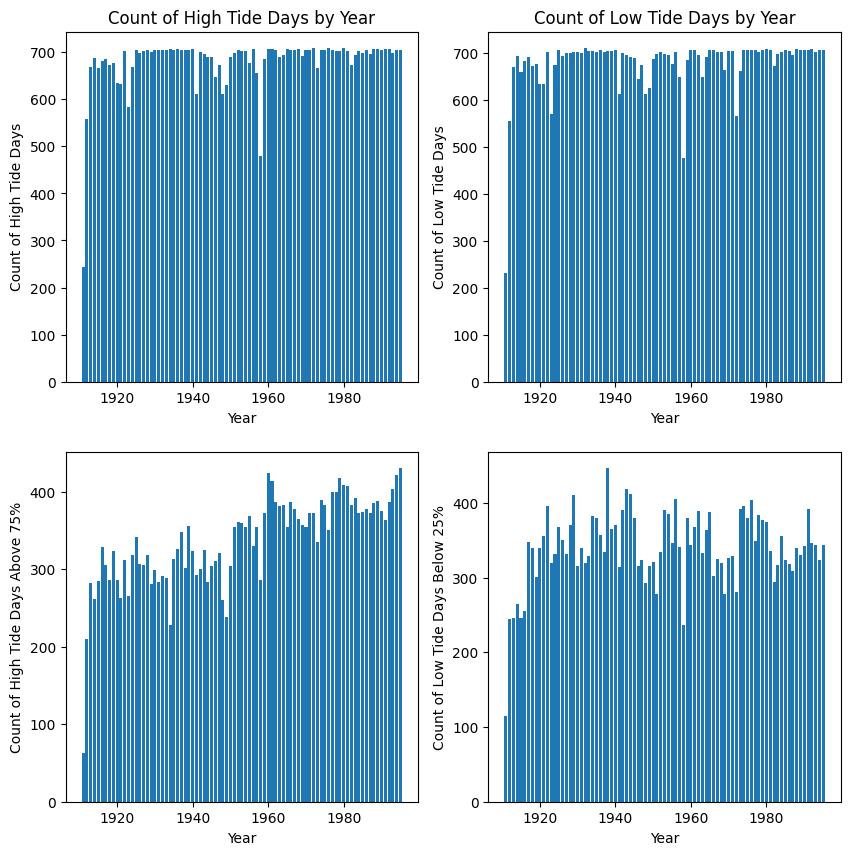

In [33]:
import matplotlib.pyplot as plt

plt.subplots(2, 2, figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.bar(x=all_high_days.index, height=all_high_days)
plt.xlabel("Year")
plt.ylabel("Count of High Tide Days")
plt.title("Count of High Tide Days by Year")

plt.subplot(2, 2, 2)
plt.bar(x=all_low_days.index, height=all_low_days)
plt.xlabel("Year")
plt.ylabel("Count of Low Tide Days")
plt.title("Count of Low Tide Days by Year")

plt.subplot(2, 2, 3)
plt.bar(x=high_days.index, height=high_days)
plt.xlabel("Year")
plt.ylabel("Count of High Tide Days Above 75%")

plt.subplot(2, 2, 4)
plt.bar(x=low_days.index, height=low_days)
plt.xlabel("Year")
plt.ylabel("Count of Low Tide Days Below 25%")

plt.show()

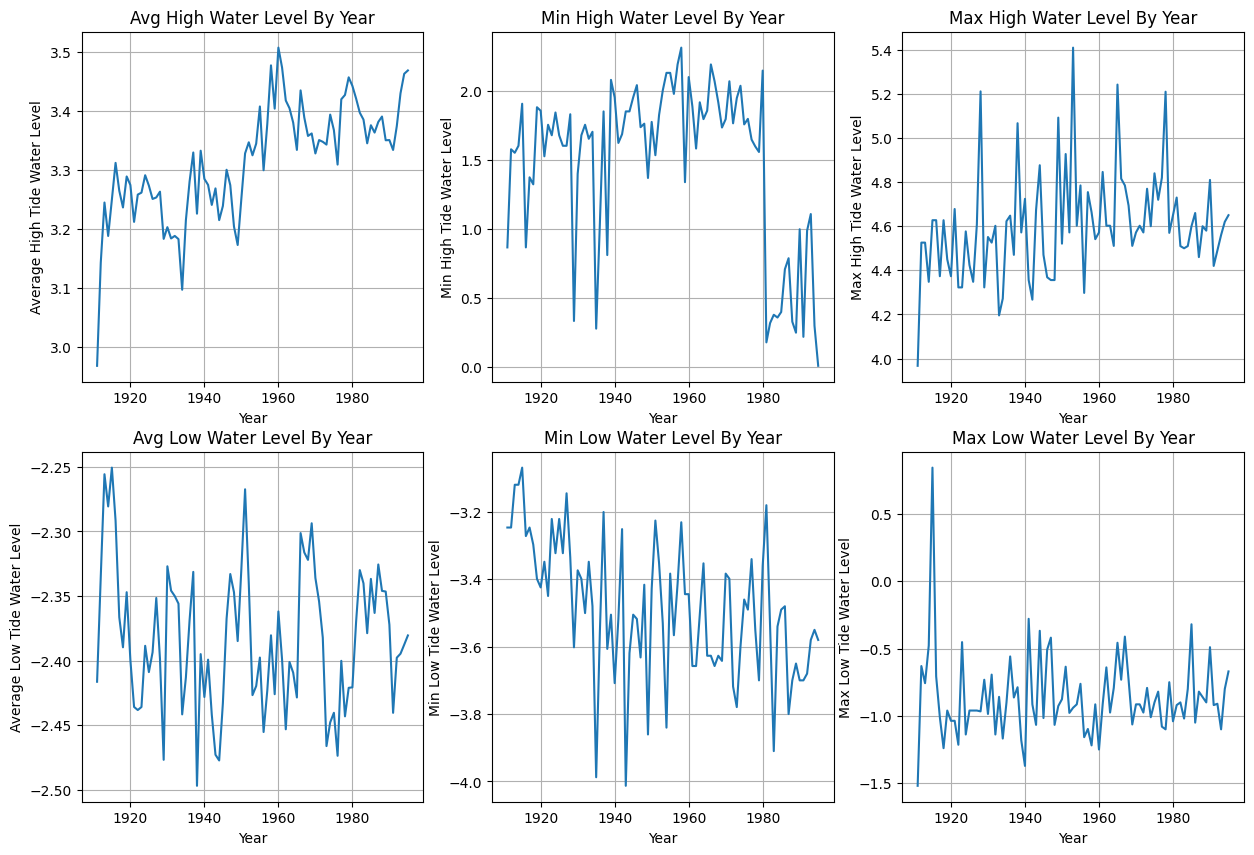

In [34]:
avg_high_by_year = london_bridge[london_bridge["is_high_tide"] == 1][["year", "water_level"]].groupby("year").mean()
avg_low_by_year = london_bridge[london_bridge["is_high_tide"] == 0][["year", "water_level"]].groupby("year").mean()

min_high_by_year = london_bridge[london_bridge["is_high_tide"] == 1][["year", "water_level"]].groupby("year").min()
min_low_by_year = london_bridge[london_bridge["is_high_tide"] == 0][["year", "water_level"]].groupby("year").min()

max_high_by_year = london_bridge[london_bridge["is_high_tide"] == 1][["year", "water_level"]].groupby("year").max()
max_low_by_year = london_bridge[london_bridge["is_high_tide"] == 0][["year", "water_level"]].groupby("year").max()

plt.subplots(2, 3, figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.plot(avg_high_by_year.index, avg_high_by_year["water_level"])
plt.xlabel("Year")
plt.ylabel("Average High Tide Water Level")
plt.title("Avg High Water Level By Year")
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(min_high_by_year.index, min_high_by_year["water_level"])
plt.xlabel("Year")
plt.ylabel("Min High Tide Water Level")
plt.title("Min High Water Level By Year")
plt.grid(True)

plt.subplot(2, 3, 3)
plt.plot(max_high_by_year.index, max_high_by_year["water_level"])
plt.xlabel("Year")
plt.ylabel("Max High Tide Water Level")
plt.title("Max High Water Level By Year")
plt.grid(True)

plt.subplot(2, 3, 4)
plt.plot(avg_low_by_year.index, avg_low_by_year["water_level"])
plt.xlabel("Year")
plt.ylabel("Average Low Tide Water Level")
plt.title("Avg Low Water Level By Year")
plt.grid(True)

plt.subplot(2, 3, 5)
plt.plot(min_low_by_year.index, min_low_by_year["water_level"])
plt.xlabel("Year")
plt.ylabel("Min Low Tide Water Level")
plt.title("Min Low Water Level By Year")
plt.grid(True)

plt.subplot(2, 3, 6)
plt.plot(max_low_by_year.index, max_low_by_year["water_level"])
plt.xlabel("Year")
plt.ylabel("Max Low Tide Water Level")
plt.title("Max Low Water Level By Year")
plt.grid(True)

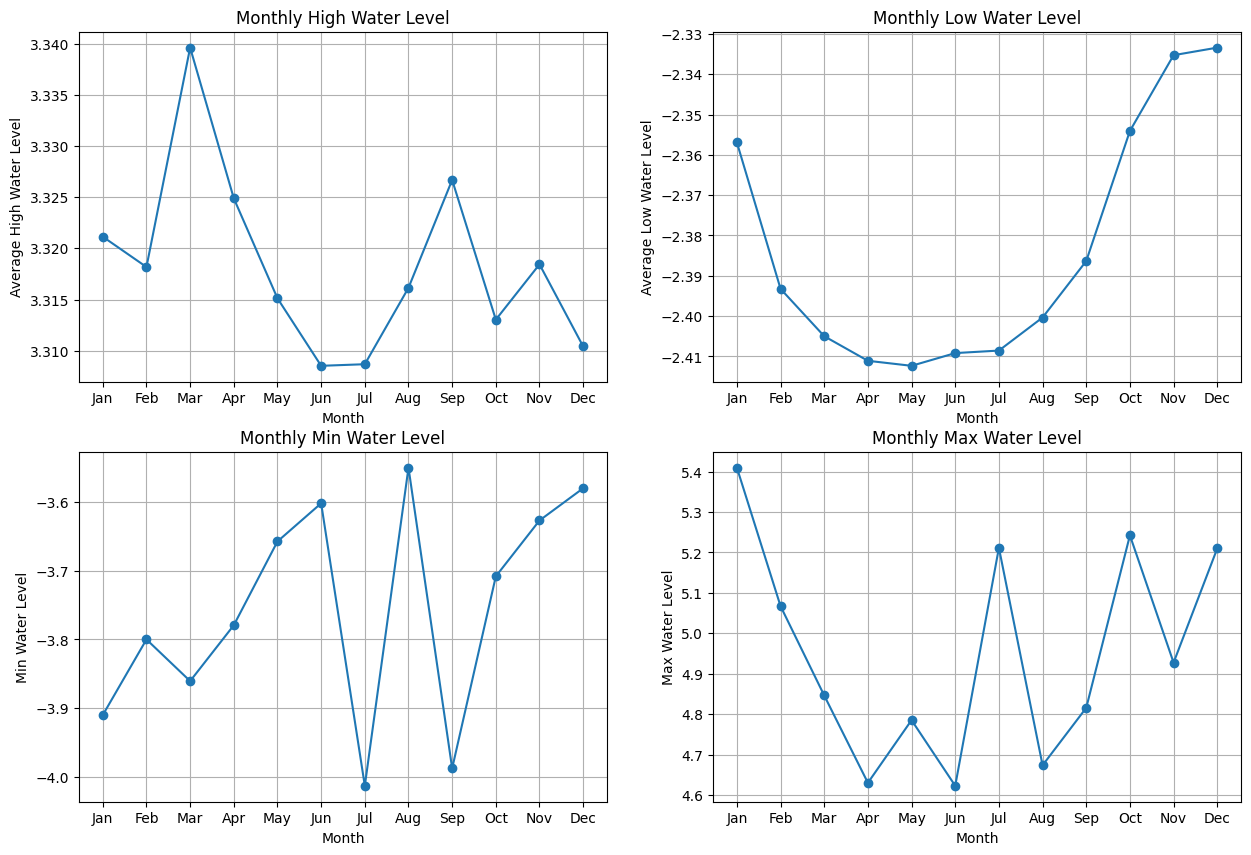

In [35]:
# Calculate the average water level for each month
monthly_avg_high = london_bridge[london_bridge["is_high_tide"] == 1].groupby("month")["water_level"].mean()
monthly_avg_low = london_bridge[london_bridge["is_high_tide"] == 0].groupby("month")["water_level"].mean()

monthly_min = london_bridge[london_bridge["is_high_tide"] == 0].groupby("month")["water_level"].min()
monthly_max = london_bridge[london_bridge["is_high_tide"] == 1].groupby("month")["water_level"].max()

# Plotting the monthly average water level
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.subplots(2, 2, figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(months, monthly_avg_high, marker="o")
plt.xlabel("Month")
plt.ylabel("Average High Water Level")
plt.title("Monthly High Water Level")
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(months, monthly_avg_low, marker="o")
plt.xlabel("Month")
plt.ylabel("Average Low Water Level")
plt.title("Monthly Low Water Level")
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(months, monthly_min, marker="o")
plt.xlabel("Month")
plt.ylabel("Min Water Level")
plt.title("Monthly Min Water Level")
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(months, monthly_max, marker="o")
plt.xlabel("Month")
plt.ylabel("Max Water Level")
plt.title("Monthly Max Water Level")
plt.grid(True)
plt.show()

### Conclusion:

By analyzing the time series data of tide levels in the River Thames at London Bridge, we gained several insights into the tide patterns and variations. Here are some key findings:

1. Typical Tide Levels: The average and median high tide levels were calculated, along with the IQR, providing a sense of the usual range of high tide levels. Similarly, the same statistics were calculated for low tide levels.

2. Count of High and Low Tide Days: We counted the number of high and low tide days per year and determined the ratio of days above the 75th percentile and below the 25th percentile. This information helps understand the frequency of extreme tide events.

3. Tide Level Trends: Plots of average, minimum, and maximum tide levels by year for both high and low tide categories provided insights into the long-term trends and fluctuations in tide levels.

4. Monthly Variation: Analyzing the average, minimum, and maximum tide levels by month revealed any monthly patterns or variations in tide levels.
